In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# plot decsion regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=[colors[idx]], marker=markers[idx], label=cl)



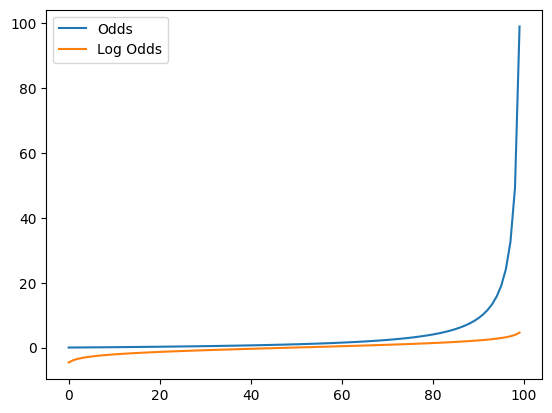

In [29]:
odds_list = []
log_odds_list = []
for p in np.linspace(0.01, 0.99, 100):
    odds = p / (1 - p)
    log_odds = np.log(odds)
    odds_list.append(odds)
    log_odds_list.append(log_odds)
    #print('Odds: {:.2f}, Log Odds: {:.2f}'.format(odds, log_odds))

plt.plot(odds_list)
plt.plot(log_odds_list)
plt.legend(['Odds', 'Log Odds'])
plt.show()

In [30]:
def logit(p):
    odds = p / (1 - p)
    return np.log(odds)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
sigmoid(logit(0.8531))

0.8531000000000001

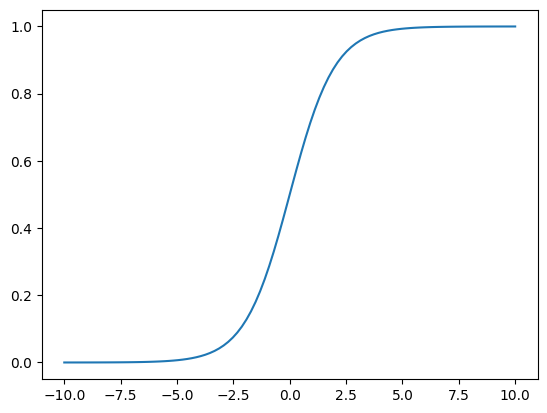

In [32]:
plt.plot(np.linspace(-10, 10, 100), sigmoid(np.linspace(-10, 10, 100)))
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

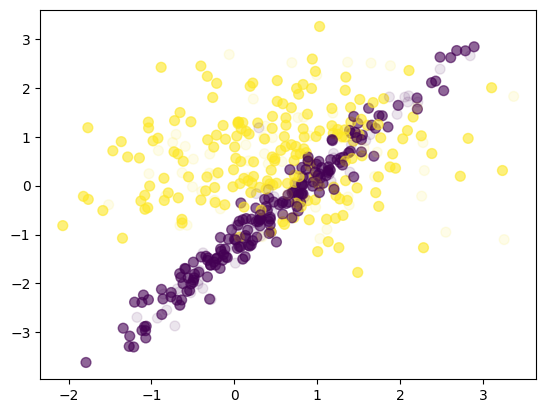

In [34]:
X, y = make_classification(n_samples=500, n_classes=2, n_clusters_per_class=1, n_features=2, n_informative=2, n_redundant=0, class_sep=0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, alpha=0.1)
plt.show()


In [35]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Train score: {:.2f}'.format(lr.score(X_train, y_train)))

svm = SVC(C=1.0) # C = slack variable
svm.fit(X_train, y_train)
print('Train score: {:.2f}'.format(svm.score(X_train, y_train)))

Train score: 0.77
Train score: 0.86


In [37]:
# from sklearn.linear_model import SGDClassifier

# lr = SGDClassifier(loss='log_loss', max_iter=1000)
# ppn = SGDClassifier(loss='perceptron', max_iter=1000)
# svm = SGDClassifier(loss='hinge', max_iter=1000)

# lr.fit(X_train, y_train)
# ppn.fit(X_train, y_train)
# svm.fit(X_train, y_train)

# print('Logistic Regression Train score: {:.2f}'.format(lr.score(X_train, y_train)))
# print('Perceptron Train score: {:.2f}'.format(ppn.score(X_train, y_train)))
# print('SVM Train score: {:.2f}'.format(svm.score(X_train, y_train)))

In [41]:
y_pred = lr.predict(X_test)
print('Test score: {:.2f}'.format(lr.score(X_test, y_test)))

y_pred_svm = svm.predict(X_test)
print('Test score: {:.2f}'.format(svm.score(X_test, y_test)))

Test score: 0.71
Test score: 0.90


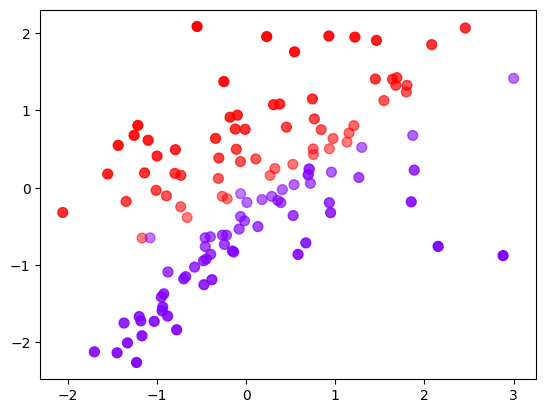

In [39]:
y_pred_proba = lr.predict_proba(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='rainbow', alpha=np.max(y_pred_proba, axis=1))
plt.show()

## What does gamma do in the RBF kernel?

Train score: 0.75
Test score: 0.72


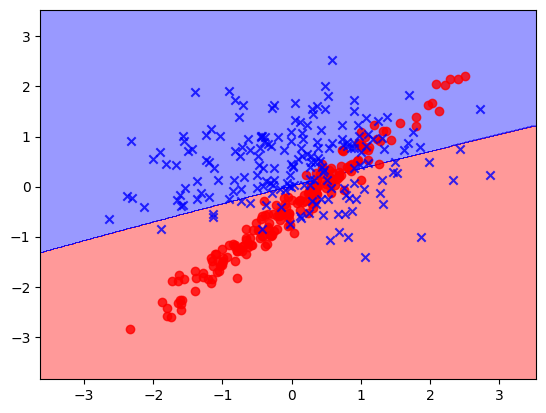

Train score: 0.79
Test score: 0.75


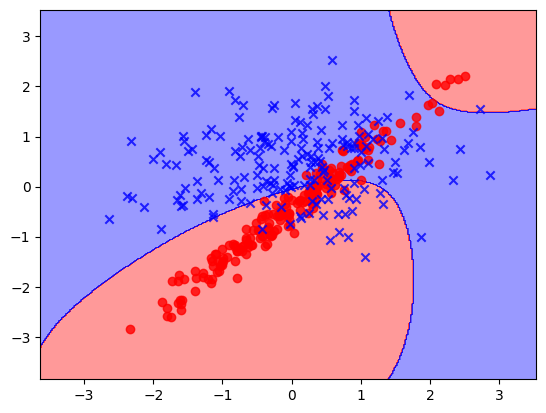

Train score: 0.87
Test score: 0.91


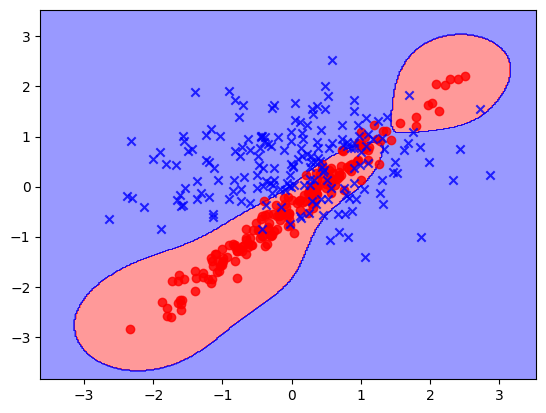

Train score: 0.91
Test score: 0.90


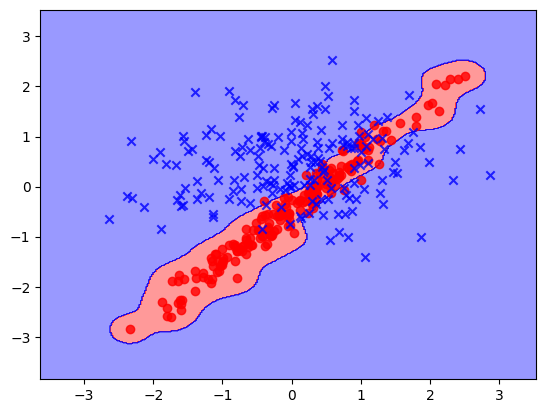

Train score: 0.96
Test score: 0.85


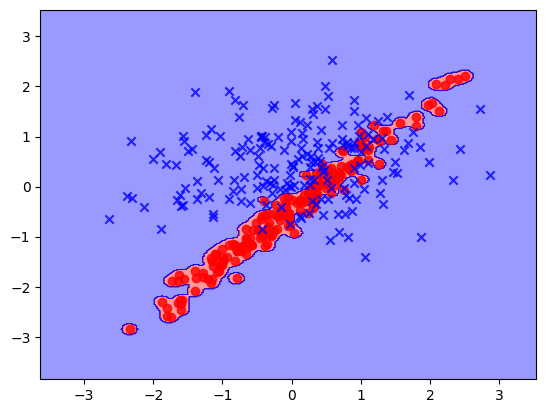

In [43]:
for gam in [0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=1.0, kernel="rbf", gamma=gam)
    svm.fit(X_train, y_train)
    print('Train score: {:.2f}'.format(svm.score(X_train, y_train)))
    print('Test score: {:.2f}'.format(svm.score(X_test, y_test)))
    plot_decision_regions(X_train, y_train, svm)
    plt.show()
